# Galton-Brett
Simulation eines Galton-Bretts mit Zufallszahlen ("Monte-Carlo-Methode")

Für jeden Streukörper gilt: die Kugel geht mit je 50% Wahrscheinlichkeit nach links/rechts. Nach $n$ Lagen von Streukörpern ergibt sich damit eine Häufigkeitsverteilung, die näherungsweise einer Gaußverteilung entspricht.


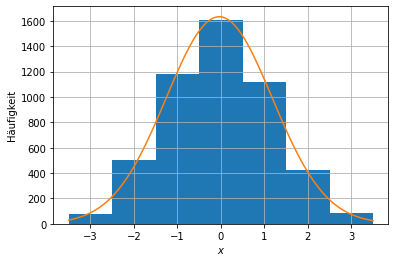

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Anzahl der Kugeln
nkugeln = 5000

# Anzahl der Lagen
nlagen = 6
verschiebung = nlagen/2

# Ziehe nkugeln x nlagen Zufallszahlen (mit je 50% Wahrscheinlichkeit 0 oder 1)
rng = np.random.default_rng( 12345 )
zufallszahlen = rng.integers( 2, size = ( nkugeln, nlagen ) )

# Summe der Zufallszahlen pro Kugel entspricht Position ("bin") auf dem Galton-Brett
summe = zufallszahlen.sum( axis = 1 )

# Summe um -nlagen/2 verschieben -> Verteilung symmetrisch um 0
summe = summe - verschiebung

# Plot
fig,ax = plt.subplots()

# Histogramm
bingrenzen = np.arange( -verschiebung - 0.5, verschiebung + 1.5 )
ax.hist( summe, bins=bingrenzen )

# Vergleich mit Gaussverteilung
mittelwert, standardabweichung = stats.norm.fit( summe )
x = np.linspace( -verschiebung - 0.5, verschiebung + 0.5, 100 )
y = nkugeln * stats.norm.pdf( x, mittelwert, standardabweichung )
ax.plot( x, y )

# Verschönerung der Darstellung
ax.set_xlabel( r'$x$' )
ax.set_ylabel( r'Häufigkeit' )
ax.grid( True )

# Grafik abspeichern und zeigen
plt.savefig( 'galton.pdf' )
plt.show()